In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xception/tensorflow2/default/1/xception_weights_tf_dim_ordering_tf_kernels_notop (7).h5
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_22.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_53.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_69.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_68.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_51.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_88.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_4.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_75.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_16.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_72.jpg
/kaggle/input/microorganism-image-classification/Micro_Orga

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

In [4]:
import os
import shutil

# Define paths for input data and output
input_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"  # Correct path
output_path = "/kaggle/working/data"

# Define paths for train, val, test
train_path = os.path.join(output_path, "train")
val_path = os.path.join(output_path, "val")
test_path = os.path.join(output_path, "test")

# Create main directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Classes (update based on actual folders)
classes = ["Amoeba", "Euglena", "Hydra", "Paramecium", "Rod_bacteria", "Spherical_bacteria", "Spiral_bacteria", "Yeast"]

# Create class subfolders in train, val, test
for class_name in classes:
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

# Organize data
for class_name in classes:
    class_dir = os.path.join(input_path, class_name)

    if not os.path.exists(class_dir):
        print(f"Class directory '{class_name}' does not exist in {input_path}. Skipping...")
        continue

    images = os.listdir(class_dir)

    # Skip classes with less than 2 images
    if len(images) < 2:
        print(f"Skipping class '{class_name}' due to insufficient data.")
        continue

    for img in images:
        source = os.path.join(class_dir, img)
        destination = os.path.join(train_path, class_name, img)  # Customize splitting logic if needed
        shutil.copy(source, destination)

    print(f"Class '{class_name}' processed successfully.")



Class 'Amoeba' processed successfully.
Class 'Euglena' processed successfully.
Class 'Hydra' processed successfully.
Class 'Paramecium' processed successfully.
Class 'Rod_bacteria' processed successfully.
Class 'Spherical_bacteria' processed successfully.
Class 'Spiral_bacteria' processed successfully.
Class 'Yeast' processed successfully.


Classes found: ['Amoeba', 'Euglena', 'Spherical_bacteria', 'Hydra', 'Rod_bacteria', 'Spiral_bacteria', 'Paramecium', 'Yeast']


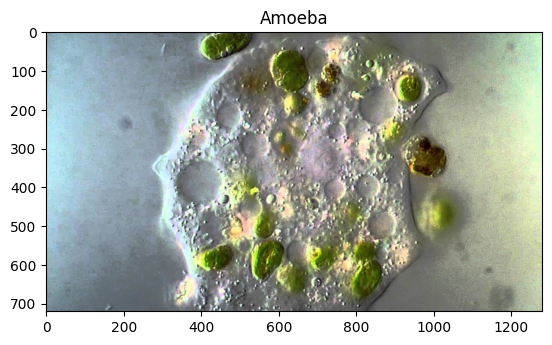

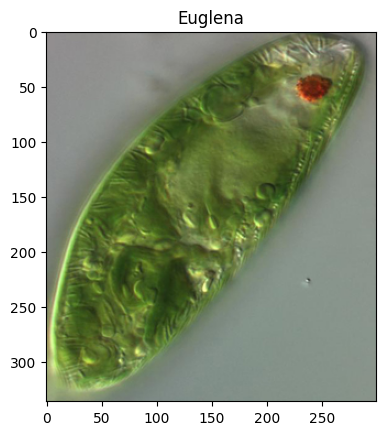

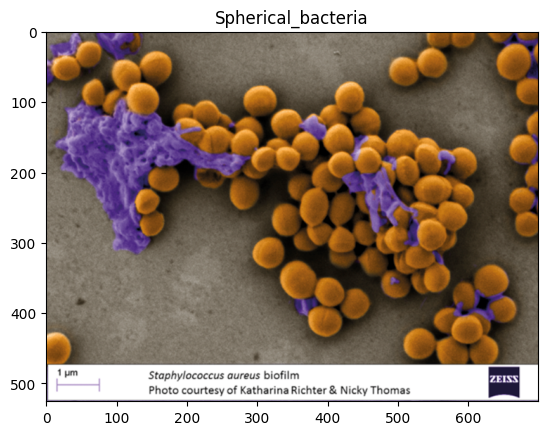

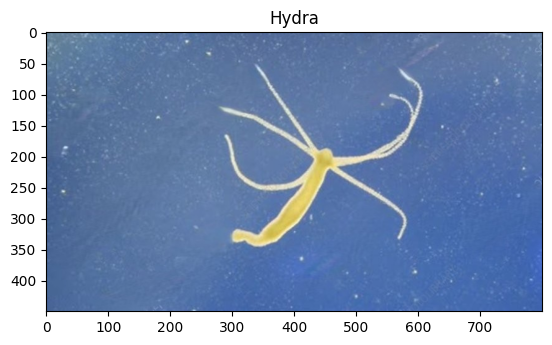

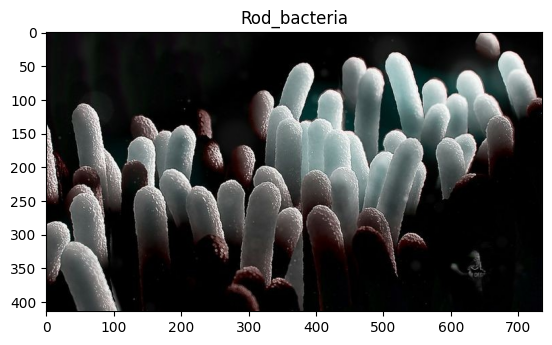

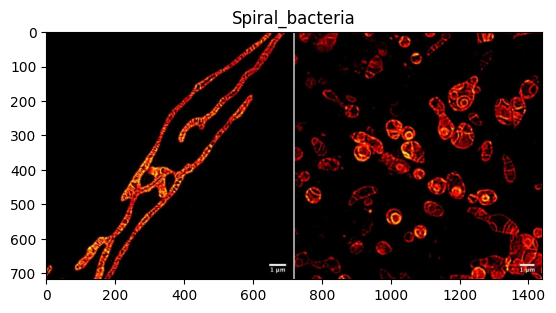

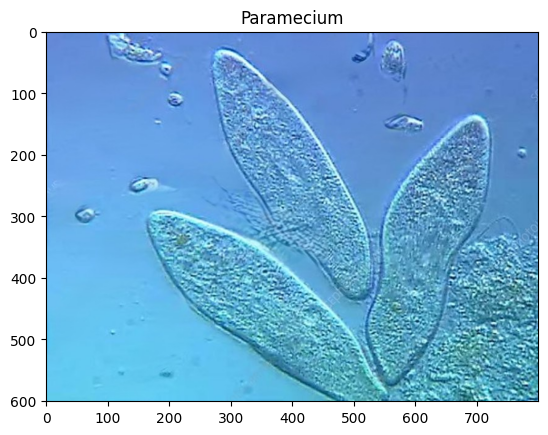

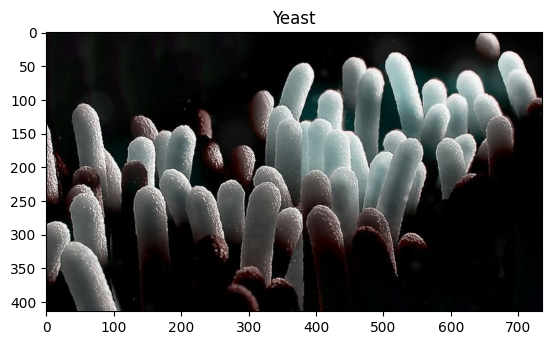

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"

# Visualize classes and check for structure
classes = os.listdir(dataset_path)
print(f"Classes found: {classes}")

# Example: Visualize a sample image from each class
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    sample_image = os.listdir(class_dir)[0]  # Take the first image
    img = Image.open(os.path.join(class_dir, sample_image))
    plt.imshow(img)
    plt.title(class_name)
    plt.show()


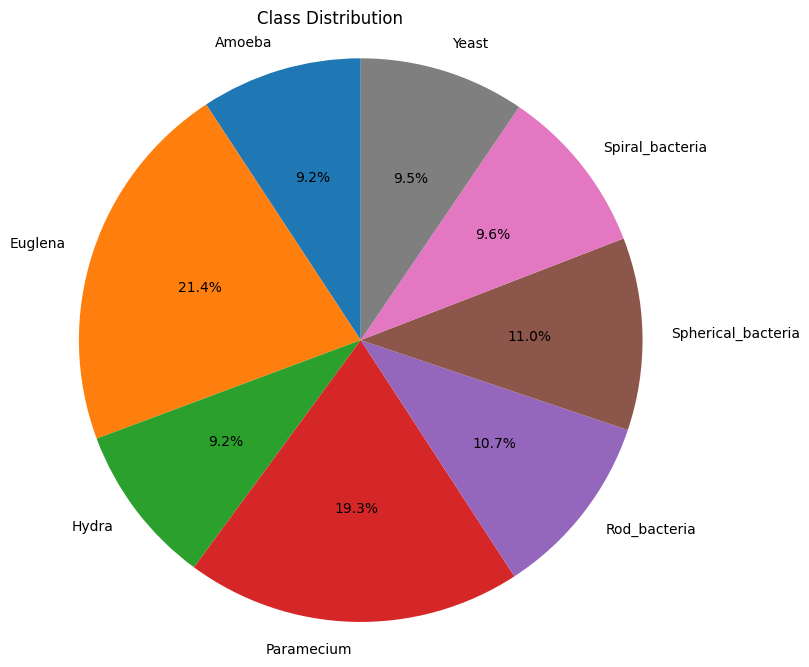

Amoeba: 72 images
Euglena: 167 images
Hydra: 72 images
Paramecium: 150 images
Rod_bacteria: 83 images
Spherical_bacteria: 86 images
Spiral_bacteria: 75 images
Yeast: 74 images


In [6]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset directory
dataset_path = '/kaggle/input/microorganism-image-classification/Micro_Organism'

# Define class names based on actual folders in the dataset
class_names = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']

# List to hold the distribution counts of each class
class_dis = []

# Count the number of images per class
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.exists(class_path):
        image_count = len([f for f in os.listdir(class_path) if f.endswith(('.tif', '.jpg', '.png', '.jpeg'))])
        class_dis.append(image_count)
    else:
        print(f"Class folder '{class_name}' not found. Skipping...")
        class_dis.append(0)

# Verify that class_dis contains valid counts
if sum(class_dis) == 0:
    print("No valid images found in the dataset. Please check the dataset structure and file extensions.")
else:
    # Create a pie chart using matplotlib
    plt.figure(figsize=(8, 8))
    plt.pie(class_dis, labels=class_names, autopct='%1.1f%%', startangle=90)
    plt.title("Class Distribution", x=0.45)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
    plt.show()

# Optional: Print counts for debugging
for class_name, count in zip(class_names, class_dis):
    print(f"{class_name}: {count} images")


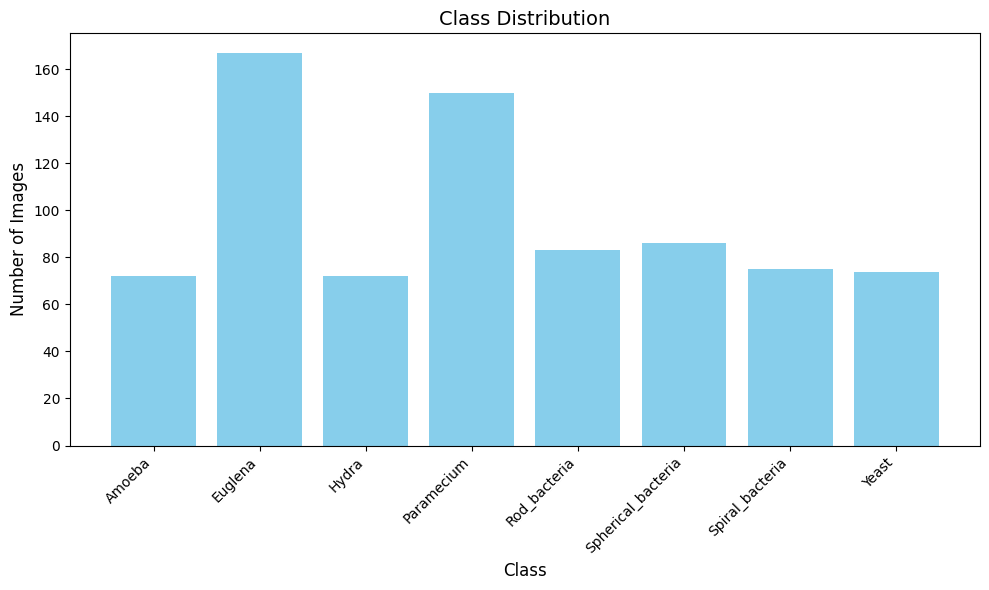

In [7]:
import matplotlib.pyplot as plt
import os

# Define the path to your dataset directory
dataset_path = '/kaggle/input/microorganism-image-classification/Micro_Organism'

# Define class names (directories)
class_names = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']

# List to hold the distribution counts of each class
class_dis = []

# Count the number of images per class
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    image_count = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))])  # Check for image files
    class_dis.append(image_count)

# Create a bar plot using matplotlib
plt.figure(figsize=(10,6))
plt.bar(class_names, class_dis, color='skyblue')

# Title and labels
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha="right")  # Rotate x labels for better visibility
plt.tight_layout()
plt.show()


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 3: Data Preprocessing (Normalization and Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation and test

# Set up the data generators
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Resizing the images to the input size of the model
    batch_size=32,
    class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to avoid shuffling for final evaluation
)


Found 789 images belonging to 8 classes.
Found 0 images belonging to 8 classes.
Found 0 images belonging to 8 classes.


In [9]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Step 2: Split data into Train, Test, and Validation
# Correct the input path (fixing the typo "Micro_Organismr")
input_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"  # Update with actual dataset path
train_path = "/kaggle/working/data/train"
val_path = "/kaggle/working/data/val"
test_path = "/kaggle/working/data/test"

# List of classes (ensure they match the folder names)
classes = ["Amoeba", "Euglena", "Hydra", "Paramecium", "Rod_bacteria", "Spherical_bacteria", "Spiral_bacteria", "Yeast"]

# Loop through each class and split the data
for class_name in classes:
    class_dir = os.path.join(input_path, class_name)
    
    # Check if the class directory exists
    if os.path.exists(class_dir):
        images = os.listdir(class_dir)  # List all images in the directory
        
        if len(images) < 2:  # Skip classes with less than 2 images
            print(f"Skipping class '{class_name}' due to insufficient data.")
            continue
        
        # Split images into train/test
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
        
        # Further split the train set into train/validation
        train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)
        
        # Create directories for train, val, and test sets
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_path, class_name), exist_ok=True)
        
        # Copy images to respective directories
        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_path, class_name, img))
        
        for img in val_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_path, class_name, img))
        
        for img in test_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_path, class_name, img))
        
        print(f"Class '{class_name}' split into train, validation, and test.")
    else:
        print(f"Class directory '{class_name}' does not exist in {input_path}.")


Class 'Amoeba' split into train, validation, and test.
Class 'Euglena' split into train, validation, and test.
Class 'Hydra' split into train, validation, and test.
Class 'Paramecium' split into train, validation, and test.
Class 'Rod_bacteria' split into train, validation, and test.
Class 'Spherical_bacteria' split into train, validation, and test.
Class 'Spiral_bacteria' split into train, validation, and test.
Class 'Yeast' split into train, validation, and test.


In [10]:
import os

input_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"
print("Classes found:", os.listdir(input_path))


Classes found: ['Amoeba', 'Euglena', 'Spherical_bacteria', 'Hydra', 'Rod_bacteria', 'Spiral_bacteria', 'Paramecium', 'Yeast']


In [ ]:
 # Import Required Libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize


In [ ]:
 # Load and Preprocess Dataset

In [12]:
# Dataset Paths
train_path = '/kaggle/working/data/train'
val_path = '/kaggle/working/data/val'
test_path = '/kaggle/working/data/test'

# ImageDataGenerator for Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data
train_data = train_datagen.flow_from_directory(
    train_path, target_size=(299, 299), batch_size=32, class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    val_path, target_size=(299, 299), batch_size=32, class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_path, target_size=(299, 299), batch_size=32, class_mode='categorical', shuffle=False
)


Found 789 images belonging to 8 classes.
Found 128 images belonging to 8 classes.
Found 161 images belonging to 8 classes.


In [ ]:
# Build Xception Transfer Learning Model with Manual Weights

In [13]:
# Manual path for Xception weights file
manual_weights_path = '/kaggle/input/xception/tensorflow2/default/1/xception_weights_tf_dim_ordering_tf_kernels_notop (7).h5'

# Load Xception Base Model with Manual Weights
base_model = Xception(weights=manual_weights_path, include_top=False, input_shape=(299, 299, 3))


for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Flatten the feature maps
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Xception Transfer Learning Model Built Successfully!")


Xception Transfer Learning Model Built Successfully!


In [ ]:
 # Train the Model with Early Stopping

In [14]:
# EarlyStopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 238s 9s/step - accuracy: 0.2813 - loss: 1.8855 - val_accuracy: 0.7109 - val_loss: 1.0104
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 240s 9s/step - accuracy: 0.5921 - loss: 1.1562 - val_accuracy: 0.7500 - val_loss: 0.7954
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.6635 - loss: 0.9252 - val_accuracy: 0.7422 - val_loss: 0.7363
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 238s 9s/step - accuracy: 0.6961 - loss: 0.8812 - val_accuracy: 0.8047 - val_loss: 0.6259
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 227s 9s/step - accuracy: 0.7384 - loss: 0.7268 - val_accuracy: 0.8359 - val_loss: 0.5136
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.7863 - loss: 0.6977 - val_accuracy: 0.8594 - val_loss: 0.4690
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.7861 - loss: 0.6462 - val_accuracy: 0.8828 - val_loss: 0.4409
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 272s 9s/step - accuracy: 0.8022 - loss: 0.6194 - val_accuracy: 0.8594 - val_loss: 0.

In [ ]:
# Fine-Tune the Model

In [15]:
# Unfreeze Last Few Layers for Fine-Tuning
for layer in base_model.layers[-30:]:  # Fine-tune last 30 layers
    layer.trainable = True

# Re-compile Model with a Lower Learning Rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:

# Fine-Tune the Model
history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 341s 13s/step - accuracy: 0.7756 - loss: 0.6449 - val_accuracy: 0.9609 - val_loss: 0.1595
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 324s 13s/step - accuracy: 0.7960 - loss: 0.5497 - val_accuracy: 0.9609 - val_loss: 0.1589
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 330s 13s/step - accuracy: 0.8405 - loss: 0.4622 - val_accuracy: 0.9609 - val_loss: 0.1552
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 322s 13s/step - accuracy: 0.8690 - loss: 0.3925 - val_accuracy: 0.9531 - val_loss: 0.1556
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 317s 12s/step - accuracy: 0.8874 - loss: 0.3242 - val_accuracy: 0.9531 - val_loss: 0.1499
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 319s 12s/step - accuracy: 0.8987 - loss: 0.3359 - val_accuracy: 0.9531 - val_loss: 0.1478
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 315s 12s/step - accuracy: 0.8871 - loss: 0.3556 - val_accuracy: 0.9688 - val_loss: 0.1410
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 316s 12s/step - accuracy: 0.8929 - loss: 0.3391 - val_accuracy: 0.

In [ ]:
# Evaluate the Model

In [17]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.9343 - loss: 0.1638
Test Accuracy: 93.79%


In [18]:
# Accuracy and Loss Curve Visualization

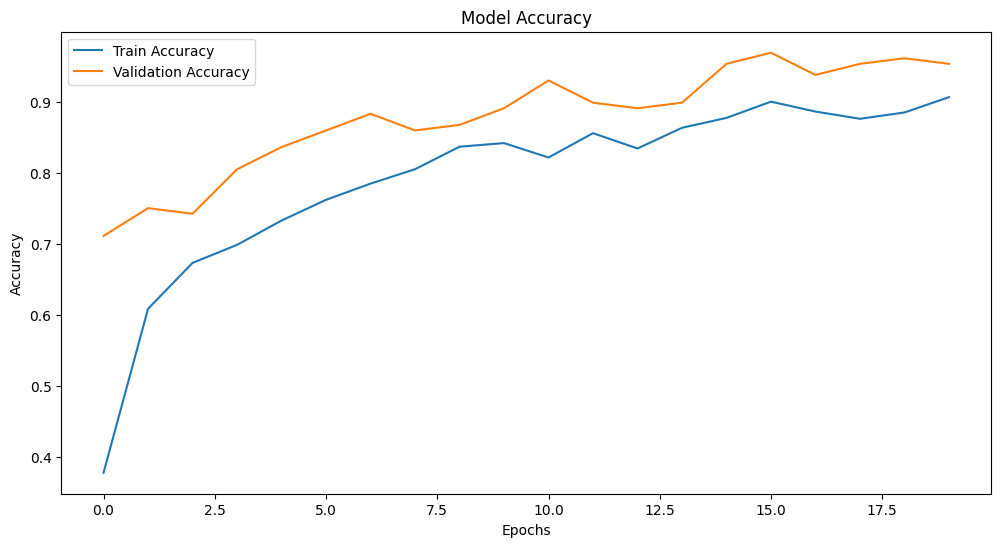

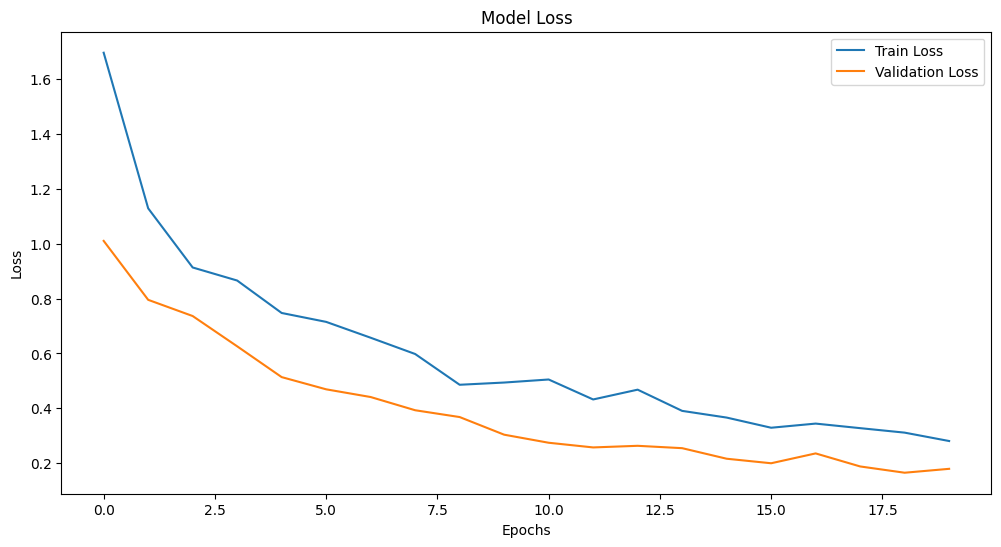

In [19]:
import matplotlib.pyplot as plt

# Plot Accuracy Curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [20]:
# Confusion Matrix Visualization

6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step


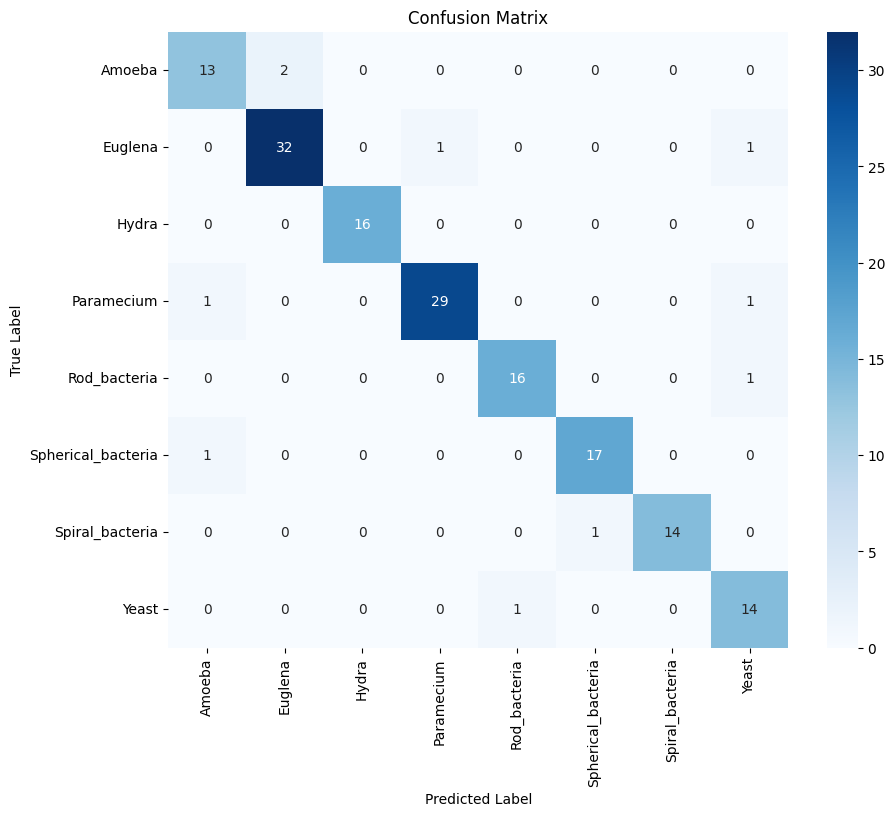

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict Test Data
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data.classes
class_names = list(test_data.class_indices.keys())

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [22]:
# Precision, Recall, and F-Score

In [23]:
from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)


Classification Report:

                    precision    recall  f1-score   support

            Amoeba       0.87      0.87      0.87        15
           Euglena       0.94      0.94      0.94        34
             Hydra       1.00      1.00      1.00        16
        Paramecium       0.97      0.94      0.95        31
      Rod_bacteria       0.94      0.94      0.94        17
Spherical_bacteria       0.94      0.94      0.94        18
   Spiral_bacteria       1.00      0.93      0.97        15
             Yeast       0.82      0.93      0.87        15

          accuracy                           0.94       161
         macro avg       0.94      0.94      0.94       161
      weighted avg       0.94      0.94      0.94       161



In [24]:
# ROC and AUC Graph for Each Class

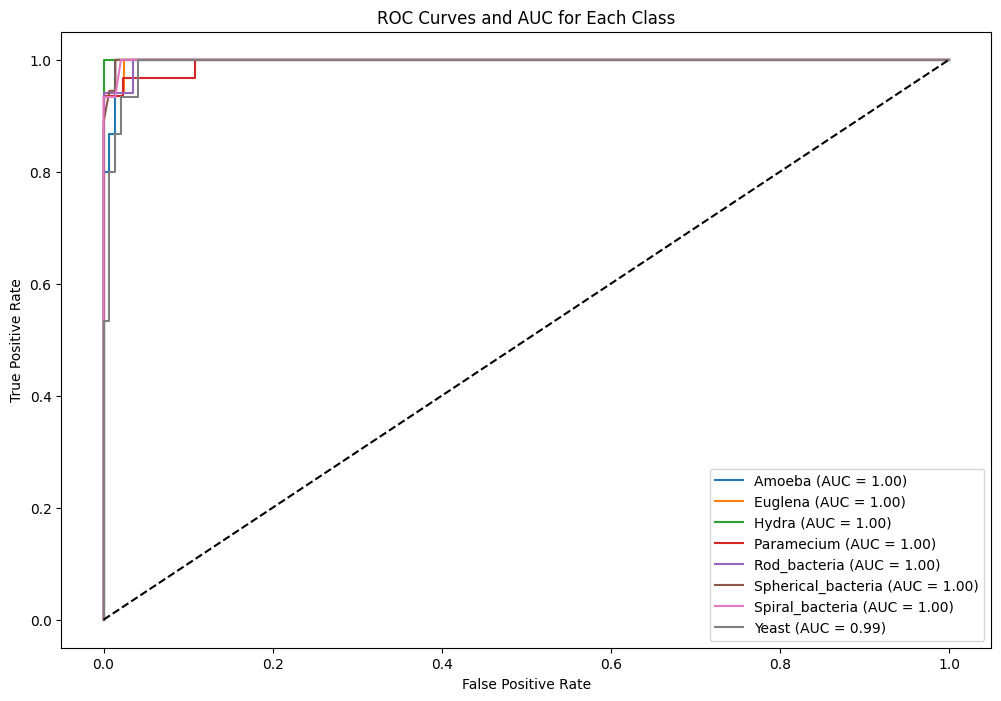

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize True Labels
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

# Plot ROC Curves
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

# Plot Diagonal Line
plt.plot([0, 1], [0, 1], 'k--')

# Final Formatting
plt.title("ROC Curves and AUC for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [26]:
# Overall Results

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute Overall Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print(f"Average Precision: {precision:.2f}")
print(f"Average Recall: {recall:.2f}")
print(f"Average F1-Score: {f1:.2f}")


Overall Accuracy: 93.79%
Average Precision: 0.94
Average Recall: 0.94
Average F1-Score: 0.94


In [28]:
 # Predict a Single Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Rod_bacteria, Confidence: 99.40%


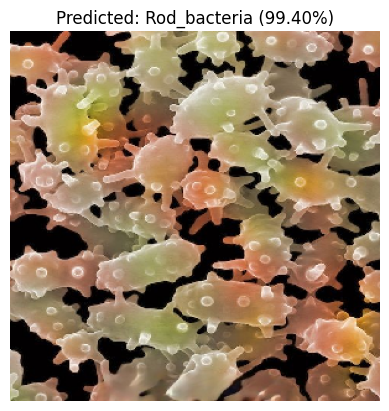

In [29]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100
    
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%")
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# Example Image Path
predict_image("/kaggle/input/microorganism-image-classification/Micro_Organism/Rod_bacteria/Image_24.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Predicted Class: Amoeba, Confidence: 97.11%


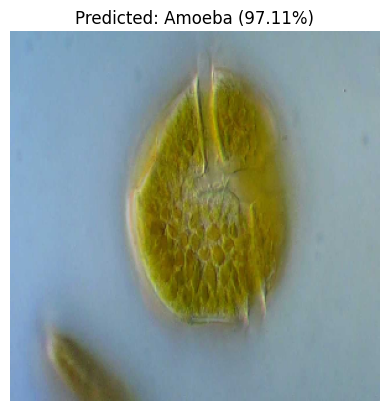

In [31]:
predict_image("/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_14.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Predicted Class: Spiral_bacteria, Confidence: 98.41%


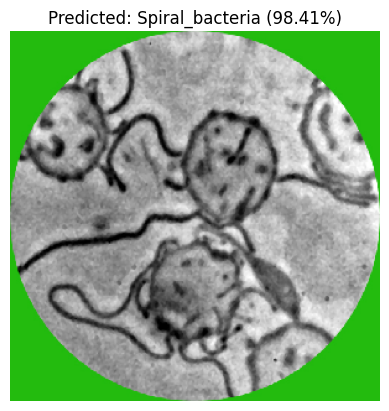

In [32]:
predict_image("/kaggle/input/microorganism-image-classification/Micro_Organism/Spiral_bacteria/Image_24.jpg", model)
